In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/kaggle-plant-pathology-2021-modificat/test/egH6YRIHfT.jpg
/kaggle/input/kaggle-plant-pathology-2021-modificat/test/cSslGwgDOE.jpg
/kaggle/input/kaggle-plant-pathology-2021-modificat/test/1CLG4Hjt9h.jpg
/kaggle/input/kaggle-plant-pathology-2021-modificat/test/EUWlGDb1dC.jpg
/kaggle/input/kaggle-plant-pathology-2021-modificat/test/63dQh25AB7.jpg
/kaggle/input/kaggle-plant-pathology-2021-modificat/test/cEmFF6Ur04.jpg
/kaggle/input/kaggle-plant-pathology-2021-modificat/test/jUAH0ydRD6.jpg
/kaggle/input/kaggle-plant-pathology-2021-modificat/test/LyvJytGo6K.jpg
/kaggle/input/kaggle-plant-pathology-2021-modificat/test/BNq9kJ2Zsi.jpg
/kaggle/input/kaggle-plant-pathology-2021-modificat/test/5phn9bPFPG.jpg
/kaggle/input/kaggle-plant-pathology-2021-modificat/test/pS3RQgOsjn.jpg
/kaggle/input/kaggle-plant-pathology-2021-modificat/test/TpQ24Wh5jr.jpg
/kaggle/input/kaggle-plant-pathology-2021-modificat/test/i9vZfOad1C.jpg
/kaggle/input/kaggle-plant-pathology-2021-modificat/test/WJEA1SA

In [3]:
from keras.preprocessing.image import ImageDataGenerator  
from keras.layers import (
    GlobalAveragePooling2D,AveragePooling2D, Multiply, Flatten,
     Dense, Dropout, Conv2D, BatchNormalization, MaxPooling2D)
from keras.layers.experimental.preprocessing import Resizing
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras import Sequential, Model
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import cv2

In [4]:
seed = 999
np.random.seed(seed)

In [5]:
train_img_Path = '../input/kaggle-plant-pathology-2021-modificat/train'
test_img_Path = '../input/kaggle-plant-pathology-2021-modificat/test'

In [6]:
import shutil
from shutil import unpack_archive
from subprocess import check_output
import glob
from distutils.dir_util import copy_tree

In [7]:
os.makedirs(os.path.join('pred/tst'))
fromdirectory =  '../input/kaggle-plant-pathology-2021-modificat/test'
todir = './pred/tst'
copy_tree(fromdirectory,todir)

['./pred/tst/egH6YRIHfT.jpg',
 './pred/tst/cSslGwgDOE.jpg',
 './pred/tst/1CLG4Hjt9h.jpg',
 './pred/tst/EUWlGDb1dC.jpg',
 './pred/tst/63dQh25AB7.jpg',
 './pred/tst/cEmFF6Ur04.jpg',
 './pred/tst/jUAH0ydRD6.jpg',
 './pred/tst/LyvJytGo6K.jpg',
 './pred/tst/BNq9kJ2Zsi.jpg',
 './pred/tst/5phn9bPFPG.jpg',
 './pred/tst/pS3RQgOsjn.jpg',
 './pred/tst/TpQ24Wh5jr.jpg',
 './pred/tst/i9vZfOad1C.jpg',
 './pred/tst/WJEA1SARMF.jpg',
 './pred/tst/snxwZc21Uh.jpg',
 './pred/tst/2Y3dpBUgJT.jpg',
 './pred/tst/VouvMMd5WL.jpg',
 './pred/tst/xGCRg5OF8T.jpg',
 './pred/tst/uryg0AMj6z.jpg',
 './pred/tst/MxuE6wCODQ.jpg',
 './pred/tst/R5RRvCSkan.jpg',
 './pred/tst/1RbhMbZeBw.jpg',
 './pred/tst/oUiwRX2IVx.jpg',
 './pred/tst/hksGwCgJvh.jpg',
 './pred/tst/BZ72B20mz8.jpg',
 './pred/tst/I2qPld3ebe.jpg',
 './pred/tst/TfjF2SVvTp.jpg',
 './pred/tst/QQi77urJoO.jpg',
 './pred/tst/hBsQOirR9e.jpg',
 './pred/tst/km1sVNJZJ1.jpg',
 './pred/tst/KIVydVWDAJ.jpg',
 './pred/tst/Ra8H3Jv6gL.jpg',
 './pred/tst/LyfN1ELGfL.jpg',
 './pred/t

In [8]:
list = os.listdir('./pred') 
number_folders = len(list)
print ("Cantidad de folders es: ", str(number_folders))
N = 0  
for dirpath, dirnames, filenames in os.walk('./pred'):
    N_c = len(filenames)
    N += N_c
    print ("Files in ", dirpath, N_c)
print ("Total Files ", N)

Cantidad de folders es:  1
Files in  ./pred 0
Files in  ./pred/tst 7527
Total Files  7527


In [9]:
list = os.listdir(train_img_Path) 
number_folders = len(list)
print ("Cantidad de folders es: ", str(number_folders))
datos_modelo = pd.DataFrame(columns=['path','cantidad'])
N = 0  
for dirpath, dirnames, filenames in os.walk(train_img_Path):
    N_c = len(filenames)
    N += N_c
    datos_modelo = datos_modelo.append({'path': dirpath ,'cantidad': N_c},ignore_index=True)
    print ("Files in ", dirpath, N_c)
print ("Total Files ", N)
datos_modelo = datos_modelo.iloc[1:]

Cantidad de folders es:  6
Files in  ../input/kaggle-plant-pathology-2021-modificat/train 0
Files in  ../input/kaggle-plant-pathology-2021-modificat/train/C5 1150
Files in  ../input/kaggle-plant-pathology-2021-modificat/train/C2 1200
Files in  ../input/kaggle-plant-pathology-2021-modificat/train/C4 1300
Files in  ../input/kaggle-plant-pathology-2021-modificat/train/C3 1100
Files in  ../input/kaggle-plant-pathology-2021-modificat/train/C1 1000
Files in  ../input/kaggle-plant-pathology-2021-modificat/train/C0 4000
Total Files  9750


,path,cantidad,porcentaje,categoria
1,../input/kaggle-plant-pathology-2021-modificat...,1150,11.7949,C5
2,../input/kaggle-plant-pathology-2021-modificat...,1200,12.3077,C2
3,../input/kaggle-plant-pathology-2021-modificat...,1300,13.3333,C4
4,../input/kaggle-plant-pathology-2021-modificat...,1100,11.2821,C3
5,../input/kaggle-plant-pathology-2021-modificat...,1000,10.2564,C1
6,../input/kaggle-plant-pathology-2021-modificat...,4000,41.0256,C0


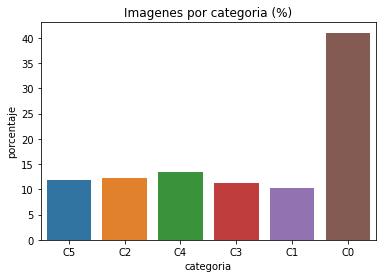

In [10]:
datos_modelo['porcentaje'] = (datos_modelo['cantidad'] / datos_modelo['cantidad'].sum()) * 100
datos_modelo['categoria'] = datos_modelo['path'].str[-2:]
sns.barplot(data = datos_modelo, x = 'categoria', y ='porcentaje' ).set_title('Imagenes por categoria (%)')
datos_modelo

In [11]:
list = os.listdir(test_img_Path) 
number_folders = len(list)
print ("Cantidad de folders es: ", str(number_folders))
N = 0  
for dirpath, dirnames, filenames in os.walk(test_img_Path):
    N_c = len(filenames)
    N += N_c
    print ("Files in ", dirpath, N_c)
print ("Total Files ", N)

Cantidad de folders es:  7527
Files in  ../input/kaggle-plant-pathology-2021-modificat/test 7527
Total Files  7527


../input/kaggle-plant-pathology-2021-modificat/train/C5/TzIgFyFSbd.jpg
../input/kaggle-plant-pathology-2021-modificat/train/C5/loOvZCUdmN.jpg
../input/kaggle-plant-pathology-2021-modificat/train/C5/0NDc68gMPB.jpg
../input/kaggle-plant-pathology-2021-modificat/train/C5/0ZvGSzwEbt.jpg
../input/kaggle-plant-pathology-2021-modificat/train/C5/mwvPPFAhKa.jpg
../input/kaggle-plant-pathology-2021-modificat/train/C2/Fhlxy1G2OF.jpg
../input/kaggle-plant-pathology-2021-modificat/train/C2/cc5ctc71tw.jpg
../input/kaggle-plant-pathology-2021-modificat/train/C2/NgwAr3Tj34.jpg
../input/kaggle-plant-pathology-2021-modificat/train/C2/UbEPjmfDtE.jpg
../input/kaggle-plant-pathology-2021-modificat/train/C2/49csfjdLAc.jpg
../input/kaggle-plant-pathology-2021-modificat/train/C4/Vd4PlIM7Kk.jpg
../input/kaggle-plant-pathology-2021-modificat/train/C4/3rb4n76HpW.jpg
../input/kaggle-plant-pathology-2021-modificat/train/C4/GMMbbN0eVa.jpg
../input/kaggle-plant-pathology-2021-modificat/train/C4/2Tu0Q5mQDC.jpg
../inp

<Figure size 1440x2880 with 0 Axes>

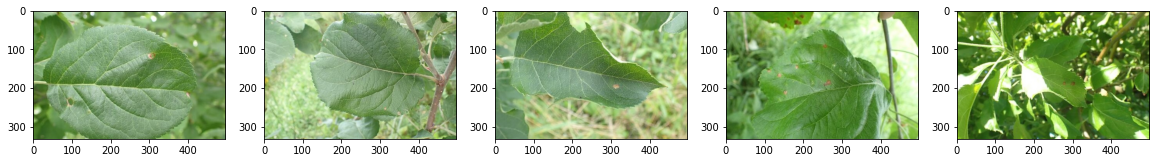

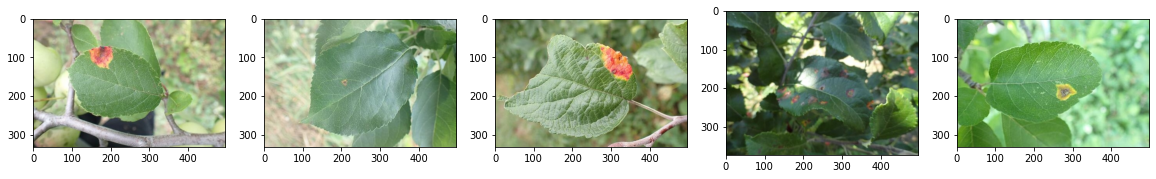

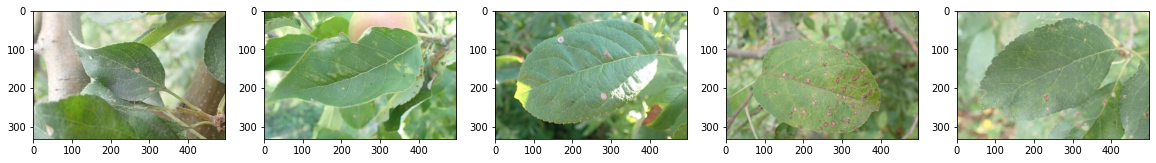

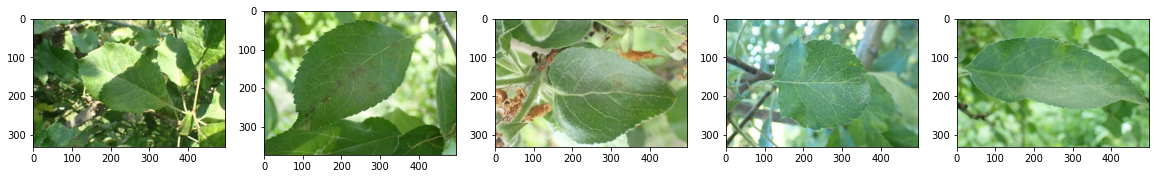

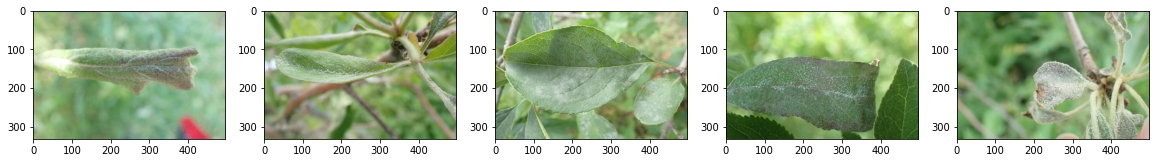

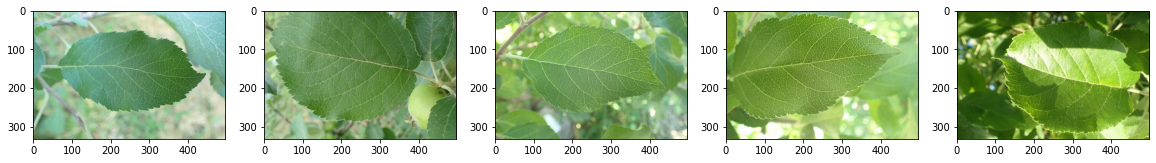

In [12]:
from pathlib import Path
import cv2
import matplotlib.image as mpimg
file_path = '../input/kaggle-plant-pathology-2021-modificat/train/'
path = train_img_Path
directory = os.listdir( path )
plt.figure(figsize=(20,40))
i=1    
for each in directory:
    plt.figure(figsize=(20,40))
    currentFolder = file_path + each
    for idx, file in enumerate(os.listdir(currentFolder)[0:5]):
        fullpath = file_path +each+'/'+ file
        print(fullpath)
        img=cv2.imread(fullpath)
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        fig=plt.subplot(6,5,i)
        fig.imshow(img)
        i+=1

In [13]:
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50, preprocess_input

In [14]:
HEIGHT = 224
WIDTH = 224
base_model = ResNet50(weights='imagenet', 
                      include_top=False, 
                      input_shape=(HEIGHT, WIDTH, 3))

94773248/94765736 [==============================] - 1s 0us/step


In [15]:
TRAIN_DIR = path
HEIGHT = 224
WIDTH = 224
BATCH_SIZE = 32
datagen1 = ImageDataGenerator(preprocessing_function=preprocess_input, 
                                shear_range = 0.1,
                                zoom_range = 0.1,
                                horizontal_flip = True,
                                vertical_flip = True,
                                validation_split=0.3)
train_generator1 = datagen1.flow_from_directory(
    directory = path,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    subset='training',
    shuffle=True,
    class_mode = "categorical",
    seed = seed)
validation_generator1 = datagen1.flow_from_directory(
    directory = path, 
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    subset='validation', 
    shuffle=False,
    class_mode = "categorical",
    seed = seed) 

Found 6825 images belonging to 6 classes.
Found 2925 images belonging to 6 classes.


In [16]:
pred_dir = './pred/'
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, 
                                shear_range = 0.1,
                                zoom_range = 0.1,
                                horizontal_flip = True,
                                vertical_flip = True,
                                validation_split=0.3)
test_data = test_datagen.flow_from_directory(
    directory=pred_dir,
    target_size=(HEIGHT, WIDTH),
    #color_mode="rgb",
    batch_size=32,
    class_mode=None,
    shuffle=False
)

Found 7527 images belonging to 1 classes.


In [17]:
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.models import Sequential, Model
from keras.models import model_from_json
def arquitectura_model4(base_model, dropout, fc_layers, num_classes):
    for layer in base_model.layers:
        layer.trainable = False
    x = base_model.output
    x = Flatten()(x)
    for fc in fc_layers:
                x = Dense(fc, activation='relu')(x) 
        x = Dropout(dropout)(x)
    predictions = Dense(num_classes, activation='softmax')(x) 
        model4 = Model(inputs=base_model.input, outputs=predictions)
    return model4
class_list = 6
FC_LAYERS = [1024, 1024]
dropout = 0.5
model4 = arquitectura_model4(base_model, 
                      dropout=dropout, 
                      fc_layers=FC_LAYERS, 
                      num_classes=6)

In [18]:
from keras.callbacks import ModelCheckpoint
import tensorflow_addons as tfa
f1_m = tfa.metrics.F1Score(num_classes = 6, average = 'macro')
NUM_EPOCHS = 30
BATCH_SIZE = 16
num_train_images = 100
adam = Adam(lr=0.00001)
model4.compile(adam, loss='categorical_crossentropy', metrics=['accuracy', f1_m])
es4 = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights=True)
callbacks_list = [es4]
history4 = model4.fit(train_generator1, epochs=NUM_EPOCHS, workers=8,  
                        shuffle=False, 
                        callbacks=callbacks_list,
                        batch_size = BATCH_SIZE,
                        validation_data = (validation_generator1))

Epoch 1/30
214/214 [==============================] - 118s 508ms/step - loss: 2.1942 - accuracy: 0.3707 - f1_score: 0.2729 - val_loss: 0.9168 - val_accuracy: 0.6687 - val_f1_score: 0.5636
Epoch 2/30
214/214 [==============================] - 108s 496ms/step - loss: 1.1383 - accuracy: 0.5913 - f1_score: 0.4956 - val_loss: 0.7424 - val_accuracy: 0.7456 - val_f1_score: 0.6742
Epoch 3/30
214/214 [==============================] - 107s 492ms/step - loss: 0.9388 - accuracy: 0.6743 - f1_score: 0.5958 - val_loss: 0.6857 - val_accuracy: 0.7614 - val_f1_score: 0.7008
Epoch 4/30
214/214 [==============================] - 109s 500ms/step - loss: 0.8238 - accuracy: 0.7110 - f1_score: 0.6438 - val_loss: 0.6439 - val_accuracy: 0.7822 - val_f1_score: 0.7287
Epoch 5/30
214/214 [==============================] - 109s 499ms/step - loss: 0.7614 - accuracy: 0.7367 - f1_score: 0.6686 - val_loss: 0.6142 - val_accuracy: 0.7904 - val_f1_score: 0.7354
Epoch 6/30
214/214 [==============================] - 108s 4

In [19]:
accuracyBasemodel= model4.evaluate(validation_generator1, verbose = 0)[1]
epochsBasemodel = len(history4.history['accuracy'])
parametersBasemodel = model4.count_params()
print(accuracyBasemodel)
print(epochsBasemodel)
print(parametersBasemodel)

0.8471794724464417
30
127404934


In [20]:
def acc_plot(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train_val','Validation_val'])
  plt.show()
def f1_plot(history):
  plt.plot(history.history['f1_score'])
  plt.plot(history.history['val_f1_score'])
  plt.title('Model F1 Score')
  plt.ylabel('F1')
  plt.xlabel('Epoch')
  plt.legend(['Train_val','Validation_val'])
  plt.show()
def loss_plot(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train_val','Validation_val'])
  plt.show()

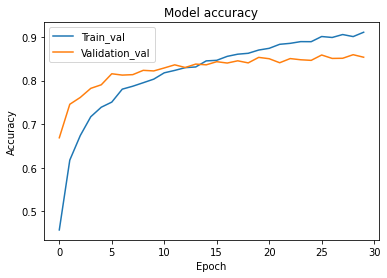

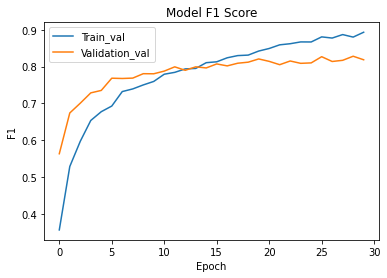

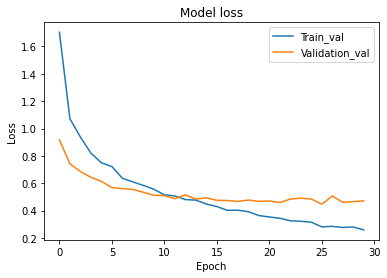

In [21]:
acc_plot(history4)
f1_plot(history4)
loss_plot(history4)

In [22]:
from sklearn.metrics import classification_report
predictions2 = model4.predict(validation_generator1, 
                            verbose = 0)
predicted_classes2 = np.argmax(predictions2, axis=1)
true_classes2 = validation_generator1.classes
class_labels2 = validation_generator1.class_indices.keys()
report = classification_report(true_classes2, predicted_classes2, 
                               target_names=class_labels2)
print(report)  

              precision    recall  f1-score   support

          C0       0.90      0.98      0.94      1200
          C1       0.90      0.92      0.91       300
          C2       0.85      0.86      0.86       360
          C3       0.84      0.66      0.74       330
          C4       0.75      0.73      0.74       390
          C5       0.81      0.72      0.76       345

    accuracy                           0.86      2925
   macro avg       0.84      0.81      0.82      2925
weighted avg       0.86      0.86      0.85      2925



/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


[Text(0, 0.5, 'C0'),
 Text(0, 1.5, 'C1'),
 Text(0, 2.5, 'C2'),
 Text(0, 3.5, 'C3'),
 Text(0, 4.5, 'C4'),
 Text(0, 5.5, 'C5')]

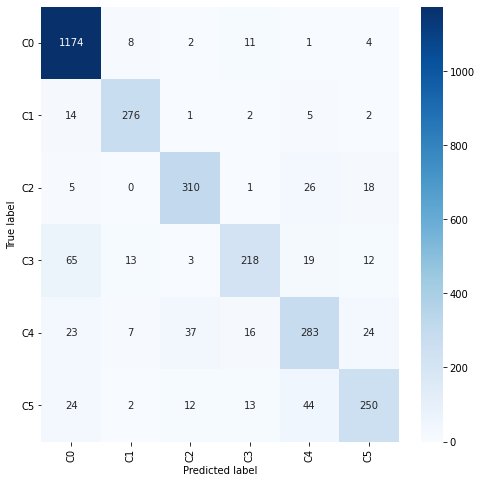

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
Y_pred = model4.predict_generator(validation_generator1)
y_pred = np.argmax(predictions2, axis=1)
cm = confusion_matrix(validation_generator1.classes, y_pred)
target_names = validation_generator1.class_indices.keys()
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True,ax=ax,cmap='Blues',fmt='g')
ax.set_xlabel('Predicted label')
ax.set_xticklabels(target_names,rotation=90)
ax.set_ylabel('True label')
ax.set_yticklabels(target_names,rotation=0)

In [24]:
modelbase_json = model4.to_json()
with open("modelbase.json", "w") as json_file:
    json_file.write(modelbase_json)
model4.save_weights("modelbase.h5")

In [25]:
from keras.models import model_from_json
json_file = open('modelbase.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("modelbase.h5")

In [26]:
import tensorflow.keras as K
import tensorflow as tf   
import tensorflow_addons as tfa
input_t = K.Input(shape=(224, 224, 3))
res_model = K.applications.ResNet50(include_top=False,
                                        weights="imagenet",          
                                        input_tensor=input_t)

In [27]:
to_res = (224, 224)
resnet = K.models.Sequential()
resnet.add(K.layers.Lambda(lambda image: tf.image.resize(image, to_res)))
resnet.add(res_model)
resnet.add(K.layers.Flatten())
resnet.add(K.layers.BatchNormalization())
resnet.add(K.layers.Dense(256, activation='relu'))
resnet.add(K.layers.Dropout(0.5))
resnet.add(K.layers.BatchNormalization())
resnet.add(K.layers.Dense(128, activation='relu'))
resnet.add(K.layers.Dropout(0.5))
resnet.add(K.layers.BatchNormalization())
resnet.add(K.layers.Dense(64, activation='relu'))
resnet.add(K.layers.Dropout(0.5))
resnet.add(K.layers.BatchNormalization())
resnet.add(K.layers.Dense(6, activation='softmax'))

In [28]:
TRAIN_DIR = path
HEIGHT =224
WIDTH = 224
BATCH_SIZE = 32
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input,
                                   rescale=1./255,
                                   shear_range = 0.1,
                                   zoom_range = 0.1,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   rotation_range = 5,
                                   validation_split=0.3)
train_data = train_datagen.flow_from_directory(
    directory = path,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    subset='training',
    shuffle=True,
    class_mode = "categorical",
    seed = seed)

valid_data = train_datagen.flow_from_directory(
    directory = path, 
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    subset='validation', 
    shuffle=False,
    class_mode = "categorical",
    seed = seed) 

Found 6825 images belonging to 6 classes.
Found 2925 images belonging to 6 classes.


In [29]:
pred_dir = './pred/'
test_datagen1 = ImageDataGenerator(preprocessing_function = preprocess_input,
                                   rescale=1./255,
                                   shear_range = 0.1,
                                   zoom_range = 0.1,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   rotation_range = 5,
                                   validation_split=0.3)
test_data1 = test_datagen1.flow_from_directory(
    directory=pred_dir,
    target_size=(HEIGHT, WIDTH),
    batch_size=32,
    class_mode=None,
    shuffle=False)

Found 7527 images belonging to 1 classes.


In [30]:
from keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
f1_m = tfa.metrics.F1Score(num_classes = 6, average = 'macro')
path_chk = './drive/MyDrive/dataprac/checkpoint/model_resnet.epoch{epoch:02d}.hdf5'
checkpoint = ModelCheckpoint(path_chk,monitor = 'val_acc',verbose = 0,save_best_only = True,
                            patience = 5,mode='max')
es = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights=True)
callbacks_list = [es]
SGD = tf.keras.optimizers.RMSprop(learning_rate=2e-5)
adam = Adam(learning_rate=0.0001)
resnet.compile(loss='categorical_crossentropy',
                  optimizer=SGD,
                  metrics=['accuracy', f1_m])
history_resnet = resnet.fit(train_data, batch_size=16, epochs=50, verbose=1,
                    callbacks=callbacks_list,
                    validation_data=(valid_data))

Epoch 1/50
214/214 [==============================] - 145s 619ms/step - loss: 2.3165 - accuracy: 0.1873 - f1_score: 0.1684 - val_loss: 5.6096 - val_accuracy: 0.1128 - val_f1_score: 0.0338
Epoch 2/50
214/214 [==============================] - 132s 615ms/step - loss: 1.8643 - accuracy: 0.3010 - f1_score: 0.2628 - val_loss: 3.8665 - val_accuracy: 0.1121 - val_f1_score: 0.0633
Epoch 3/50
214/214 [==============================] - 132s 617ms/step - loss: 1.6329 - accuracy: 0.3753 - f1_score: 0.3234 - val_loss: 2.1105 - val_accuracy: 0.1709 - val_f1_score: 0.1079
Epoch 4/50
214/214 [==============================] - 132s 616ms/step - loss: 1.4660 - accuracy: 0.4535 - f1_score: 0.3876 - val_loss: 1.5169 - val_accuracy: 0.3935 - val_f1_score: 0.2503
Epoch 5/50
214/214 [==============================] - 136s 635ms/step - loss: 1.3095 - accuracy: 0.5129 - f1_score: 0.4398 - val_loss: 0.8419 - val_accuracy: 0.7371 - val_f1_score: 0.6512
Epoch 6/50
214/214 [==============================] - 132s 6

In [31]:
accuracyResnet= resnet.evaluate(valid_data, verbose = 0)[1]
epochsResnet = len(history_resnet.history['accuracy'])
parametersResnet = resnet.count_params()
print(accuracyResnet)
print(epochsResnet)
print(parametersResnet)

0.9241025447845459
32
49722822


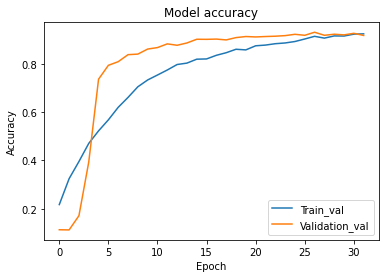

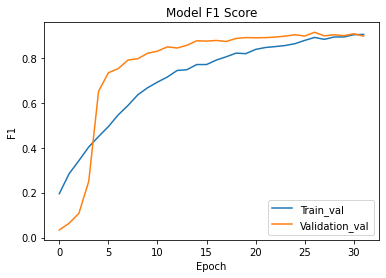

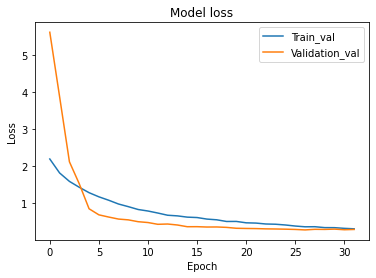

In [32]:
acc_plot(history_resnet)
f1_plot(history_resnet)
loss_plot(history_resnet)

In [33]:
predictions1 = resnet.predict(valid_data,                          
                            verbose = 0)
predicted_classes1 = np.argmax(predictions1, axis=1)
true_classes1 = valid_data.classes
class_labels1 = valid_data.class_indices.keys()
report = classification_report(true_classes1, predicted_classes1, 
                               target_names=class_labels1)
print(report)  

              precision    recall  f1-score   support

          C0       0.97      0.98      0.97      1200
          C1       0.95      0.95      0.95       300
          C2       0.86      0.95      0.90       360
          C3       0.89      0.90      0.90       330
          C4       0.88      0.74      0.80       390
          C5       0.87      0.92      0.90       345

    accuracy                           0.92      2925
   macro avg       0.91      0.91      0.90      2925
weighted avg       0.92      0.92      0.92      2925



[Text(0, 0.5, 'C0'),
 Text(0, 1.5, 'C1'),
 Text(0, 2.5, 'C2'),
 Text(0, 3.5, 'C3'),
 Text(0, 4.5, 'C4'),
 Text(0, 5.5, 'C5')]

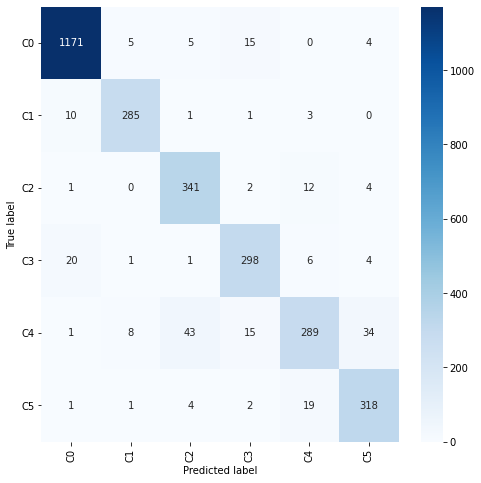

In [34]:
y_pred_resnet = np.argmax(predictions1, axis=1)
cm = confusion_matrix(valid_data.classes, y_pred_resnet)
target_names = valid_data.class_indices.keys()
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True,ax=ax,cmap='Blues',fmt='g')
ax.set_xlabel('Predicted label')
ax.set_xticklabels(target_names,rotation=90)
ax.set_ylabel('True label')
ax.set_yticklabels(target_names,rotation=0)

In [35]:
resnet_json = resnet.to_json()
with open("resnet.json", "w") as json_file:
    json_file.write(resnet_json)
resnet.save_weights("resnet.h5")

In [36]:
from keras.models import model_from_json
from keras.models import load_model
json_file = open('resnet.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("resnet.h5")